<a href="https://colab.research.google.com/github/nuramrina46/Project-ID-X-Partners/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Menghubungkan ke Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/rakamin

/content/drive/My Drive/rakamin


In [ ]:
ls

application_record.csv  credit_record.csv  loan_data_2007_2014.csv


In [ ]:
!pip install dython 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 32.8 MB/s 
     |████████████████████████████████| 281 kB 41.6 MB/s 
     |████████████████████████████████| 960 kB 43.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import joblib
import os
from dython.nominal import associations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#@title Memasukkan data
df = pd.read_csv("loan_data_2007_2014.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#@title Mengecek duplikat
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

- Objek: Format objek berarti variabel bersifat kategoris.  Variabel kategori dalam dataset terdapat 22 variabel.
- Int64: Ini mewakili variabel integer. Variabel integer dalam dataset terdapat 7 variabel.
- Float64: Ini mewakili variabel yang memiliki beberapa nilai desimal yang terlibat. Mereka juga variabel numerik. Variabel numerik dalam dataset terdapat 46 variabel.

In [ ]:
# suatu variabel akan memberi kita jumlah setiap kategori dalam variabel itu
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
# Menampilkan Deskripsi dari hasil variabel objects pada data
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [ ]:
# Mengelompokkan data yang bertype kategori dan tidak adanya kolom data yang kosong
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [ ]:
# Menghapus variabel pada data numerik yang salah dan yang memiliki nilai 0/NaN
df_a = df.dropna(axis=1,how='all')

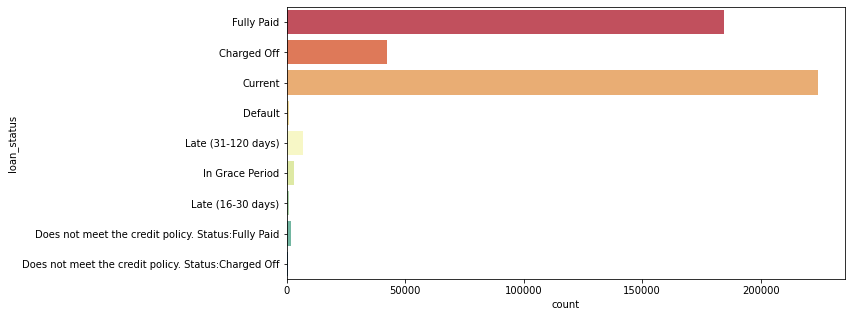

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [ ]:
# status Peminjaman 
plt.figure(figsize=(10,5))
sns.countplot(y= "loan_status", data = df_a, palette = "Spectral")
plt.show()

value_counts = df_a["loan_status"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Kolom Status Pinjaman akan digunakan pinjaman yang memiliki status gagal bayar ,dengan menentukan berhasil atau gagal dari penentuan kategori.
Dengan :
- Fully Paid = Disetujui
- Charged Off, Default dan does not meet the credit policy = Ditolak

Untuk status pinjaman yang tidak digunakan yaitu = Late, In Grace Period dan Current karena status pinjaman masih berlangsung


In [ ]:
Succes = ["Fully Paid"]
fail = ["Charged Off",
        "Default",
        "Does not meet the credit policy. Status:Charged off",
        "Does not meet the credit policy. Status:Fully Paid"]

In [ ]:
def loan(status):
    if status in fail:
        return 0
    return 1

In [ ]:
# mengubah dengan kategori 1 dan 0
df_loan = df_a[df_a["loan_status"].isin(Succes + fail)].copy()
df_loan["loan_status"] = df_loan["loan_status"].apply(loan)

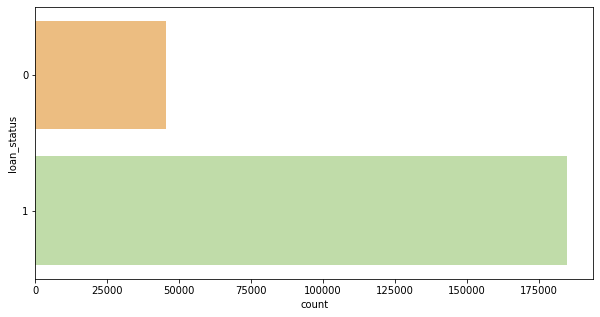

1    80.31%
0    19.69%
Name: loan_status, dtype: object


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y= "loan_status", data = df_loan, palette = "Spectral")
plt.show()

value_counts = df_loan["loan_status"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Label 1 memiliki nilai 80.31% yang berarti Status disetujui

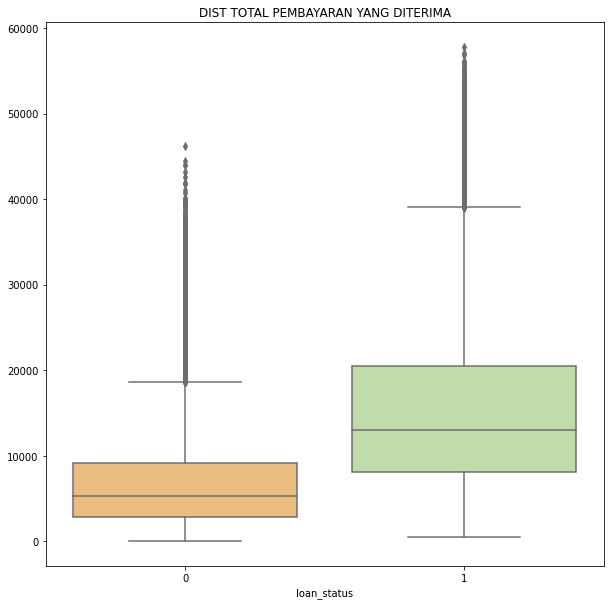

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,45295.0,6848.243678,5618.218343,0.00,2857.645000,5298.60000,9163.125,46199.44000
1,184739.0,15209.872007,9459.142043,526.33,8092.460697,12979.34106,20491.905,57777.57987


In [ ]:
#@title TOTAL PEMBAYARAN YANG DITERIMA DENGAN STATUS PINJAMAN
x = "loan_status"
y = "total_pymnt"
plt.figure(figsize=(10,10))
sns.boxplot(data = df_loan, x=x , y=y, palette = "Spectral")
plt.title("DIST TOTAL PEMBAYARAN YANG DITERIMA")
plt.ylabel("")
plt.show()

df_loan.groupby(x)[y].describe()

Dari plot diatas menunjukkan total pembayaran terbanyak ada pada pinjaman yang berstatus disetujui

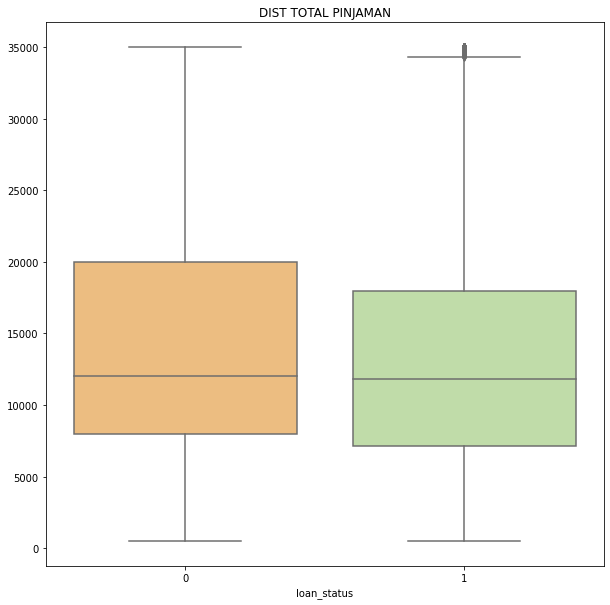

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,45295.0,14284.170990,8369.207368,500.0,8000.0,12000.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


In [ ]:
#@title  JUMLAH PINJAMAN DENGAN STATUS PINJAMAN
x = "loan_status"
y = "loan_amnt"

plt.figure(figsize=(10,10))
sns.boxplot(data = df_loan, x=x , y=y, palette = "Spectral")
plt.title("DIST TOTAL PINJAMAN")
plt.ylabel("")
plt.show()

df_loan.groupby(x)[y].describe()

Dari data diatas jumlah pinjaman terbanyak terdapat pada status setuju sedangkan mean/rata-rata berada pada status fail

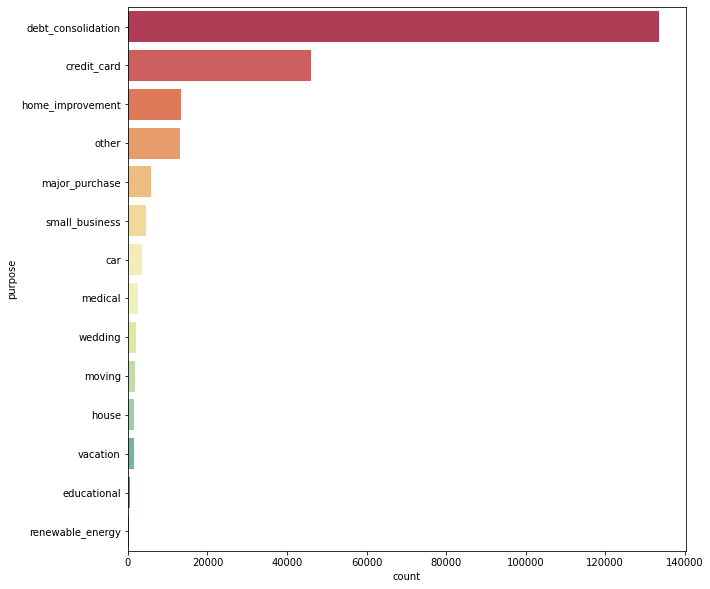

debt_consolidation    58.09%
credit_card           19.99%
home_improvement       5.81%
other                  5.73%
major_purchase         2.53%
small_business         1.99%
car                    1.50%
medical                1.14%
wedding                0.87%
moving                 0.80%
house                  0.65%
vacation               0.62%
educational            0.17%
renewable_energy       0.11%
Name: purpose, dtype: object


In [ ]:
#@title Tujuan peminjaman
plt.figure(figsize=(10,10))
sns.countplot(y= "purpose",order=value_counts.index, data = df_loan, palette = "Spectral")
plt.show()

value_counts = df_loan["purpose"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

58.09% tujuan peminjam digunakan untuk membayar hutang bulanan. Sedangkan tujuan peminjam untuk pembaruan energi dan kesehatan sedikit.

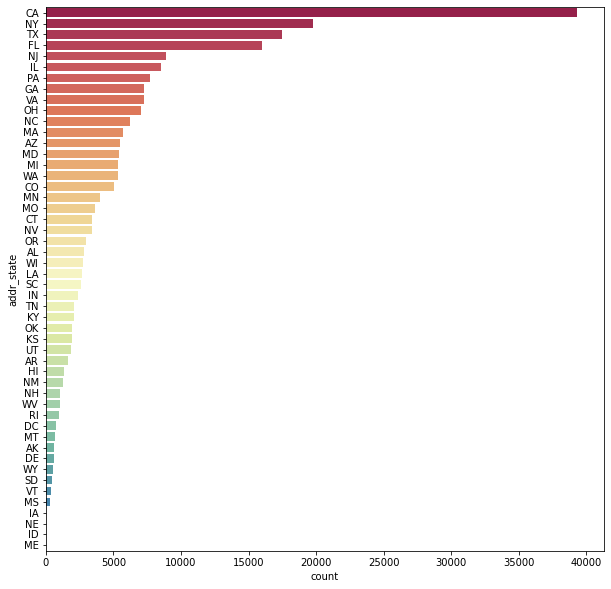

CA    17.10%
NY     8.58%
TX     7.60%
FL     6.95%
NJ     3.87%
IL     3.69%
PA     3.35%
GA     3.17%
VA     3.14%
OH     3.06%
NC     2.70%
MA     2.48%
AZ     2.38%
MD     2.37%
MI     2.33%
WA     2.32%
CO     2.18%
MN     1.73%
MO     1.59%
CT     1.50%
NV     1.48%
OR     1.31%
AL     1.24%
WI     1.21%
LA     1.16%
SC     1.12%
IN     1.04%
TN     0.91%
KY     0.90%
OK     0.84%
KS     0.83%
UT     0.82%
AR     0.70%
HI     0.57%
NM     0.54%
NH     0.46%
WV     0.45%
RI     0.43%
DC     0.34%
MT     0.29%
AK     0.27%
DE     0.26%
WY     0.24%
SD     0.21%
VT     0.17%
MS     0.12%
IA     0.00%
NE     0.00%
ID     0.00%
ME     0.00%
Name: addr_state, dtype: object


In [ ]:
#@title Negara Asal Peminjam
plt.figure(figsize=(10,10))
sns.countplot(y= "addr_state",order=value_counts.index, data = df_loan, palette = "Spectral")
plt.show()

value_counts = df_loan["addr_state"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

Asal Peminjam terbanyak berasal dari California

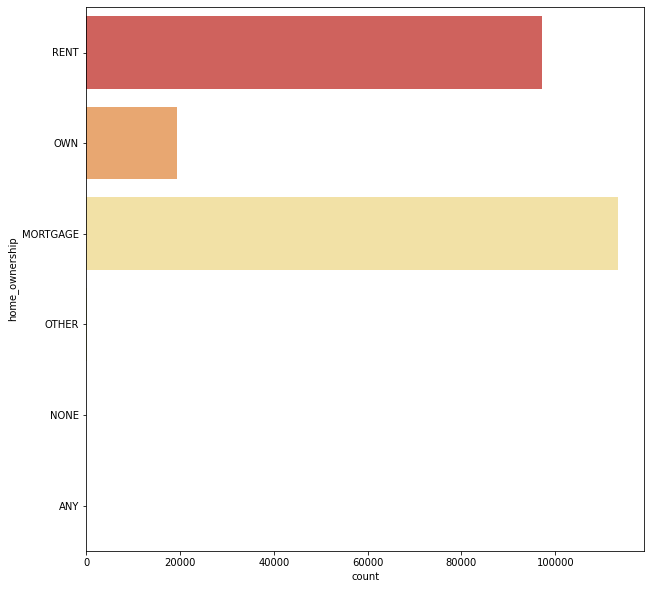

In [ ]:
#@title STATUS KEPEMILIKAN RUMAH
plt.figure(figsize=(10,10))
sns.countplot(y= "home_ownership", data = df_loan, palette = "Spectral")
plt.show()

sebagian besar pinjaman mengalokasikan rumahnya sebagai pinjaman. Dan peminjam tampak sedikit yang memiliki rumah pribadi

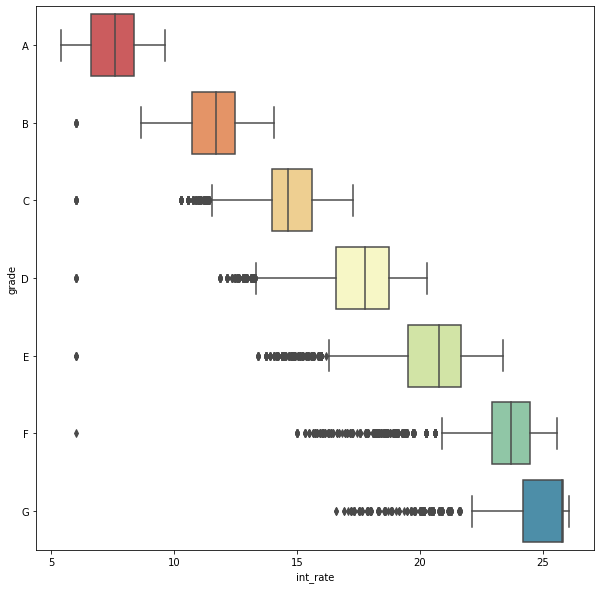

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,39102.0,7.545586,1.003550,5.42,6.62,7.62,8.39,9.63
B,70537.0,11.655698,1.280947,6.00,10.74,11.71,12.49,14.09
C,58478.0,14.772971,1.229053,6.00,13.98,14.64,15.61,17.27
D,36543.0,17.645856,1.468146,6.00,16.59,17.77,18.75,20.31
E,16787.0,20.386300,1.867371,6.00,19.52,20.80,21.70,23.40
F,6803.0,23.218681,1.983960,6.00,22.95,23.70,24.50,25.57
G,1784.0,24.406844,2.295240,16.59,24.20,25.80,25.83,26.06


In [ ]:

x = "int_rate"
y = "grade"
order = df_loan[y].sort_values().unique()
plt.figure(figsize=(10,10))
sns.boxplot(data=df_loan, x=x, y=y , order=order,palette = "Spectral")
plt.show()

df_loan.groupby(y)[x].describe()

Tingkat A hingga G terlihat meningkat yang artinya besarnya suku bunga pinjaman yang dibayarkan dari pinjaman sebelumnya.

# PRE-PROCESSING

In [ ]:
data = pd.DataFrame()

In [ ]:
data.index = df_loan.columns
data["unique"] = df_loan.nunique()
data["type"] = df_loan.dtypes
data

,unique,type
Unnamed: 0,230034,int64
id,230034,int64
member_id,230034,int64
loan_amnt,1306,int64
funded_amnt,1309,int64
funded_amnt_inv,9180,float64
term,2,object
int_rate,503,float64
installment,42890,float64
grade,7,object


In [ ]:
# 1 
uni = data[data["unique"] == df_loan.shape[0]].index.to_list()
print("Kolom Yang memiliki unik value terlalu banyak")
print(uni)
print("---------")

# 2 
col = data[data["type"] == "object"]
some_col = col[col["unique"] > 750].index.to_list()
print("Kolom Kategorik Banyak")
print(some_col)
print("---------")

# 3
col_sing_val = data[data["unique"] == 1].index.to_list()
print("Kolom terdiri dari 1 Var")
print(col_sing_val)

remov = uni + some_col + col_sing_val

Kolom Yang memiliki unik value terlalu banyak
['Unnamed: 0', 'id', 'member_id', 'url']
---------
Kolom Kategorik Banyak
['emp_title', 'url', 'desc', 'title', 'zip_code']
---------
Kolom terdiri dari 1 Var
['policy_code', 'application_type']


1. Melihat kolom yang terlalu unik sehingga perlu dilakukan penghapusan kolom tersebut

2. Melihat kolom yang memiliki kategori banyak sehingga perlu dilakukan penghapusan

3. Melihat kolom yang terlalu unik dengan kata lain memiliki 1 variabel dalam kolom tersebut

In [ ]:
new_df_loan = df_loan.loc[:, ~df_loan.columns.isin(remov)].copy()
new_df_loan.shape

# penghapusan terhadap kolom kolom yang telah dilakukan preprocessing

(230034, 48)

### FITUR DENGAN TYPE DATE

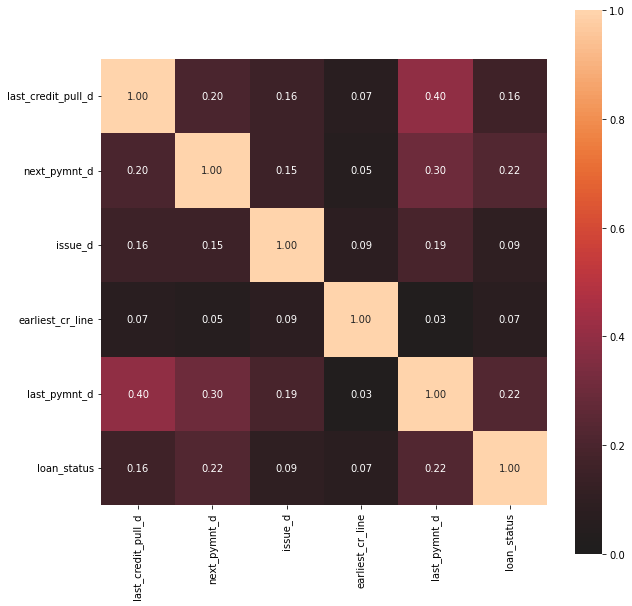

In [ ]:
# berisi kolom yang berisikan tanggal
date_cols = ["last_credit_pull_d", "next_pymnt_d", "issue_d", "earliest_cr_line", "last_pymnt_d"]

# dilakukan untuk melihat korelasi dalam kolom data date dengan status peminjaman
date_corr = date_cols + ["loan_status"]
corr = associations(new_df_loan[date_corr],
                    figsize=(10,10))

Fitur date yang digunakan memiliki korelasi > 0,15 sehingga yang < 0,15 akan dihapus.

In [ ]:
# Penggunaan fitur date
use_date = ["next_pymnt_d", "last_pymnt_d", "last_credit_pull_d"]
use_date

['next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']

In [ ]:
# Menghapus fitur date yang tidak memiliki korelasi baik terhadap status peminjaman
del_date = ["issue_d", "earliest_cr_line"]
new_df_loan = new_df_loan.drop(columns = del_date, errors = "ignore")
new_df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


### TYPE KATEGORI

In [ ]:
# Kolom berisikan type Kategorik
cat_var = new_df_loan.select_dtypes(include=object).columns
cat_var_1 = cat_var[~cat_var.isin(date_cols)]
cat_var_1

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'addr_state',
       'initial_list_status'],
      dtype='object')

In [ ]:
new_df_loan.loc[:, cat_var_1].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,AZ,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,GA,f
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,IL,f
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,CA,f
5,36 months,A,A4,3 years,RENT,Source Verified,n,wedding,AZ,f


In [ ]:
# Kolom type kategorik yang perlu dihapus 
# Karena subgrade memiliki jenis sama dengan grade
not_use_col = ["sub_grade"]

In [ ]:
new_df_loan = new_df_loan.drop(columns=not_use_col, errors = "ignore")
new_df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
any_cols_cat = cat_var_1[~cat_var_1.isin(date_cols + not_use_col)]
any_cols_cat

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

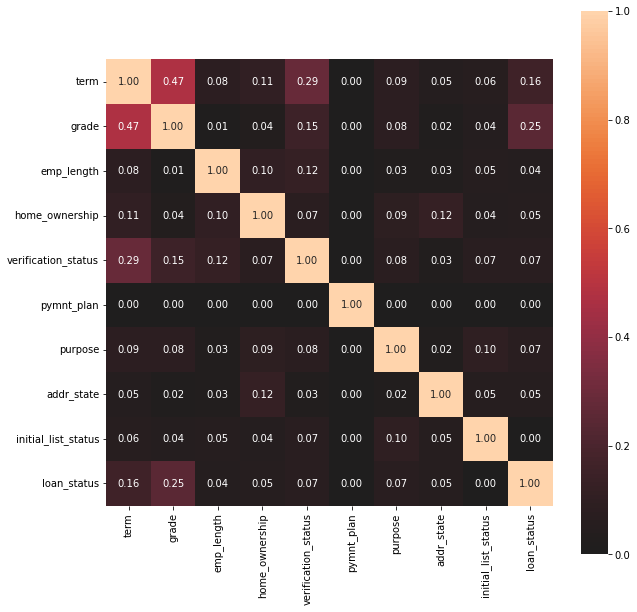

In [ ]:
# korelasi dalam kolom data date dengan status peminjaman
corr1 = any_cols_cat.to_list() + ["loan_status"]
corr_cat = associations(new_df_loan[corr1],
                    figsize=(10,10))

variabel term dan grade memiliki hubungan yang baik dibanding fitur yang lain 

In [ ]:
# Penggunaan fitur kategorik
use_cat = ["term","grade"]
use_cat

['term', 'grade']

In [ ]:
any_cols_cat

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

In [ ]:
del_cat = any_cols_cat[~any_cols_cat.isin(use_cat)]
new_df_loan = new_df_loan.drop(columns=del_cat, errors = "ignore")
new_df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,loan_status,dti,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,24000.0,1,27.65,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,30000.0,0,1.00,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,12252.0,1,8.72,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,49200.0,1,20.00,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,36000.0,1,11.20,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


### TYPE NUMERIK

In [ ]:
correl = (new_df_loan.select_dtypes(exclude=object).corr())

In [ ]:
correl["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.457482
recoveries                     0.449290
last_pymnt_amnt                0.382417
total_pymnt_inv                0.354511
total_pymnt                    0.352205
collection_recovery_fee        0.305170
int_rate                       0.241592
total_rec_late_fee             0.149802
dti                            0.109891
out_prncp                      0.100818
out_prncp_inv                  0.100816
inq_last_6mths                 0.098907
revol_util                     0.089972
tot_cur_bal                    0.076230
annual_inc                     0.061866
total_rev_hi_lim               0.052931
loan_amnt                      0.052880
funded_amnt                    0.052618
funded_amnt_inv                0.046371
installment                    0.036715
total_rec_int                  0.035606
mths_since_last_record         0.033175
total_acc                      0.029480
mths_since_last_delinq         0.025818


In [ ]:
# hubungan antara vmin dan vmax
vmin, vmax = 0.1,0.99
unstack_corr = correl.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [ ]:
use_loan = high_corr.loc["loan_status"].abs().sort_values(ascending=False)
use_loan

total_rec_prncp            0.457482
recoveries                 0.449290
last_pymnt_amnt            0.382417
total_pymnt_inv            0.354511
total_pymnt                0.352205
collection_recovery_fee    0.305170
int_rate                   0.241592
total_rec_late_fee         0.149802
dti                        0.109891
out_prncp                  0.100818
out_prncp_inv              0.100816
dtype: float64

korelasi yang akan digunakan diatas 0,2

In [ ]:
use_num = ["total_rec_prncp","recoveries","last_pymnt_amnt","total_pymnt_inv","collection_recovery_fee","int_rate"]

# menghapus kolom numerik yang tidak digunakan
del_num = use_loan[~use_loan.isin(use_num)]
new_df_loan = new_df_loan.drop(columns=del_num, errors = "ignore")
new_df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,loan_status,dti,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,24000.0,1,27.65,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,30000.0,0,1.00,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,12252.0,1,8.72,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,49200.0,1,20.00,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,36000.0,1,11.20,...,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


# TUJUAN TARGET

In [ ]:
pred_cols =  use_date + use_cat + use_num
pred_cols

['next_pymnt_d',
 'last_pymnt_d',
 'last_credit_pull_d',
 'term',
 'grade',
 'total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'total_pymnt_inv',
 'collection_recovery_fee',
 'int_rate']

### Menangani Nilai yang Hilang

In [ ]:
new_df_loan[pred_cols].isna().mean().sort_values(ascending=False)

next_pymnt_d               0.987741
last_pymnt_d               0.001582
last_credit_pull_d         0.000100
term                       0.000000
grade                      0.000000
total_rec_prncp            0.000000
recoveries                 0.000000
last_pymnt_amnt            0.000000
total_pymnt_inv            0.000000
collection_recovery_fee    0.000000
int_rate                   0.000000
dtype: float64

In [ ]:
new_df_loan.select_dtypes(include=["object"]).describe().T

,count,unique,top,freq
term,230034,2,36 months,180835
grade,230034,7,B,70537
last_pymnt_d,229670,98,Jul-15,11703
next_pymnt_d,2820,98,Feb-16,795
last_credit_pull_d,230011,103,Jan-16,93368


In [ ]:
# memasukkan nilai yang hilang dengan mod
new_df_loan["next_pymnt_d"] = new_df_loan["next_pymnt_d"].fillna("NaN")
new_df_loan["last_pymnt_d"] = new_df_loan["last_pymnt_d"].fillna("NaN")
new_df_loan["last_credit_pull_d"] = new_df_loan["last_credit_pull_d"].fillna("NaN")

In [ ]:
new_df_loan[pred_cols].isna().mean().sort_values(ascending=False)

next_pymnt_d               0.0
last_pymnt_d               0.0
last_credit_pull_d         0.0
term                       0.0
grade                      0.0
total_rec_prncp            0.0
recoveries                 0.0
last_pymnt_amnt            0.0
total_pymnt_inv            0.0
collection_recovery_fee    0.0
int_rate                   0.0
dtype: float64

# MODEL

In [ ]:
feature = new_df_loan[pred_cols].copy()
label = new_df_loan["loan_status"].copy()

##### Dilakukan pemisahan label dan fitur yang akan digunakan pada model. Dengan Label "loan_status" yang sudah dikategorikan pada awal yaitu disetujui(sukses) dan ditolak (gagal)

In [ ]:
feature_num = feature.select_dtypes(exclude="object")
feature_cat = feature.select_dtypes(include="object")

#### OneHotEncoding Fitur Kategorik

In [ ]:
feature_cat = pd.get_dummies(feature_cat)
feature_cat

,next_pymnt_d_Apr-08,next_pymnt_d_Apr-09,next_pymnt_d_Apr-10,next_pymnt_d_Apr-11,next_pymnt_d_Apr-12,next_pymnt_d_Apr-13,next_pymnt_d_Apr-14,next_pymnt_d_Apr-15,next_pymnt_d_Aug-08,next_pymnt_d_Aug-09,...,last_credit_pull_d_Sep-15,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
466277,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
466278,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
466281,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


#### Normalisasi Feature Numerik

In [ ]:
feature_num = (feature_num - feature_num.mean()) / feature_num.std()
feature_num

,total_rec_prncp,recoveries,last_pymnt_amnt,total_pymnt_inv,collection_recovery_fee,int_rate
0,-0.769580,-0.222470,-0.824326,-0.804257,-0.151108,-0.715540
1,-1.324335,-0.070220,-0.831857,-1.314575,-0.141664,0.340937
2,-1.087034,-0.222470,-0.755008,-1.103495,-0.151108,0.498723
3,-0.159093,-0.222470,-0.797389,-0.127667,-0.151108,-0.066104
5,-0.769580,-0.222470,-0.825861,-0.825460,-0.151108,-1.344395
...,...,...,...,...,...,...
466276,-1.336103,1.285202,-0.817655,-1.206522,-0.052468,1.022388
466277,-0.820753,-0.222470,-0.767570,-0.826257,-0.151108,-1.344395
466278,-0.159093,-0.222470,-0.051855,-0.109905,-0.151108,1.022388
466281,-1.155770,-0.222470,-0.846663,-0.926344,-0.151108,1.415708


#### Penggabungan feature kembali

In [ ]:
all_feature = pd.concat([feature_num, feature_cat], axis=1)
all_feature.shape

(230034, 317)

#### Data train dan Data Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_feature, label, test_size = 0.20, random_state = 42, stratify=label)

## MODEL REGRESI LOGISTIK

In [ ]:
logres = LogisticRegression(max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1)
logres

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

In [ ]:
logres.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

In [ ]:
joblib.dump(logres, "logres.z")

['logres.z']

In [ ]:
logres = joblib.load("logres.z")

#### Training DataSet

In [ ]:
logres.score(X_train, y_train)

0.962875012905715

In [ ]:
report_mat_classi = classification_report(y_true=y_train, y_pred=logres.predict(X_train))
print(report_mat_classi)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     36236
           1       0.99      0.96      0.98    147791

    accuracy                           0.96    184027
   macro avg       0.93      0.97      0.94    184027
weighted avg       0.97      0.96      0.96    184027



#### Testing DataSet

In [ ]:
logres.score(X_test, y_test)

0.9627230638815832

In [ ]:
report_mat_classi = classification_report(y_true=y_test, y_pred=logres.predict(X_test))
print(report_mat_classi)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9059
           1       0.99      0.96      0.98     36948

    accuracy                           0.96     46007
   macro avg       0.93      0.96      0.94     46007
weighted avg       0.97      0.96      0.96     46007



#### Confusion Matrix

In [ ]:
conff_matx = confusion_matrix(y_true=y_test, y_pred=logres.predict(X_test))

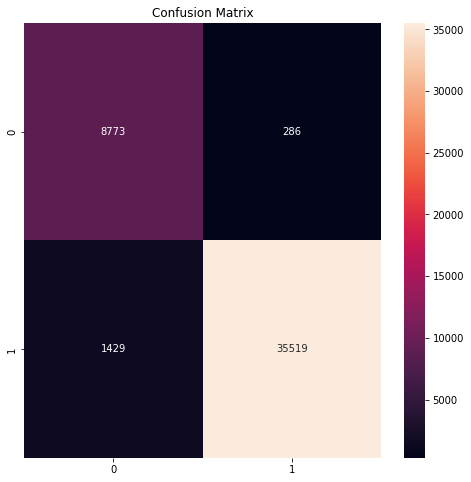

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(conff_matx, annot=True, fmt="g")
plt.title("Confusion Matrix")
plt.show()